# Assignment 1: Approximation of mathematical functions

## Working on the assignment, todo and not todo:
<b><u>Todo</u></b>:<br />
<div class="alert alert-success">
<ul><li>&#x2714; <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students</li>
<li>&#x2714; Test and save your assignment - <b>submit the last tested and saved version</b></li>
<li>&#x2714; to <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab)</li>
<li>&#x2714; submit <b>only</b> the <b>ipynb</b> file under the name <b>hw1.ipynb</b></li>
<li>&#x2714; It is advisable to add extra cells to check your code implementation</li></ul>
</div>
<b><u>Not todo</u></b>:<br />
<div class="alert alert-danger">
<ul><li>&#x2718; do <b>NOT</b> submit an <b>empty assignment</b></li>
<li>&#x2718; do <b>NOT submit extra files</b>, <u>unless you're asked to do so</u></li>
<li>&#x2718; <b>Do NOT submit a .py/.txt/.rar/.zip (or any non (.ipynb) file)</b> <u>version for the notebook</u> of the assignment</li>
<li>&#x2718; <b>do NOT change</b> the notebook file name</li></ul>
</div>

In [ ]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating cosine function

Function $\cos$ is defined on positive real numbers: $\cos(x): \mathcal{R} \rightarrow [-1, 1]$. The Taylor series for $\cos$ has [the following form](https://en.wikipedia.org/wiki/Sine_and_cosine):

\begin{align}\cos (x)  &= 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots \\
&= \sum_{n=1}^\infty (-1)^{n}\frac{x^{2n}}{2n!}
\end{align}



1. Implement `cos1` that approximates $\cos(x)$



In [9]:
import math

def cos_taylor(x, terms): 
  # I chose to name the function cos_taylor to make it easy for me to diffrentiate the functions """
    result = 0
    sign = 1
    for n in range(terms):
        term = sign * (x**(2*n) / math.factorial(2*n))
        result += term
        sign *= -1
    return result
cos_taylor(1,15)



0.5403023058681397

 2. Plot  `np.cos` and `cos1` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   

---


    

   


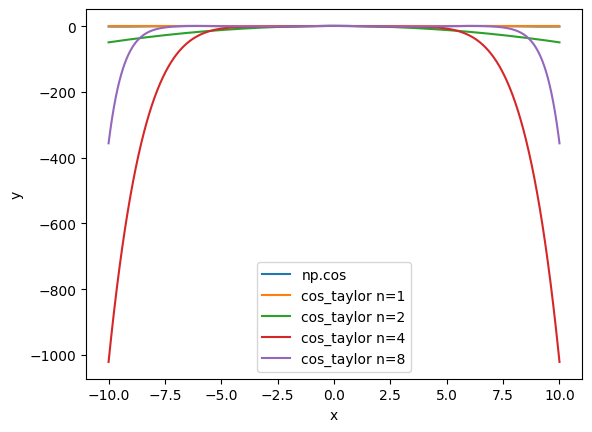

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cos_taylor(x, n):
  
    cos_approx = 0
    sign = 1
    for i in range(n):
        term = sign * (x**(2*i)) / np.math.factorial(2*i)
        cos_approx += term
        sign *= -1
    return cos_approx

x_values = np.linspace(-10, 10, 500)

plt.plot(x_values, np.cos(x_values), label="np.cos")

for n in [1, 2, 4, 8]:
    cos_approx = [cos_taylor(x, n) for x in x_values]
    plt.plot(x_values, cos_approx, label=f"cos_taylor n={n}")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")

plt.show()


3. Implement `cos2` that approximates $\cos(x),\,-\infty < x < \infty$ in a more efficient way. _Hint:_ $\cos (x + \pi) = - \cos(x)$.


In [10]:
import numpy as np

def cos2(x, n):
    
    x = x % (2*np.pi)
    if x > np.pi:
        x -= 2*np.pi

    if x > np.pi/2:
        x = np.pi - x
        sign = -1
    else:
        sign = 1

    cos_approx = 1
    term = 1
    i = 1
    while i <= n:
        term = -term * x**2 / ((2*i-1)*(2*i))
        cos_approx += term
        i += 1

    return sign * cos_approx


 4. Plot  `np.cos` and `cos2` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.

> Indented block


    



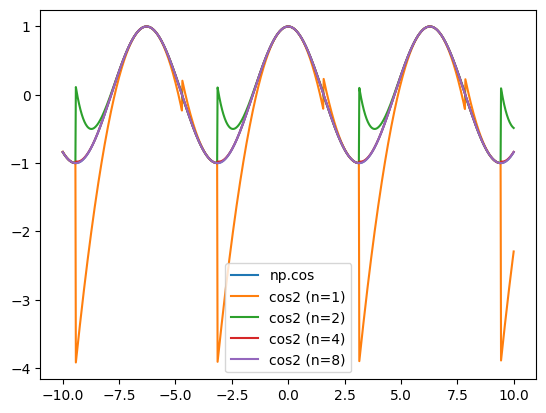

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cos2(x, n=10):
    
  #  Computes an efficient approximation of cos(x) for all x using the identity cos(x+pi)=-cos(x),
  #  up to n terms in the Taylor series.
    
    x = x % (2*np.pi)
    if x > np.pi:
        x -= 2*np.pi

    if x > np.pi/2:
        x = np.pi - x
        sign = -1
    else:
        sign = 1

    cos_approx = 1
    term = 1
    i = 1
    while i <= n:
        term = -term * x**2 / ((2*i-1)*(2*i))
        cos_approx += term
        i += 1

    return sign * cos_approx

x = np.linspace(-10, 10, 1000)

y_cos = np.cos(x)

y_cos2_1 = [cos2(x_i, n=1) for x_i in x]
y_cos2_2 = [cos2(x_i, n=2) for x_i in x]
y_cos2_4 = [cos2(x_i, n=4) for x_i in x]
y_cos2_8 = [cos2(x_i, n=8) for x_i in x]

plt.plot(x, y_cos, label='np.cos')
plt.plot(x, y_cos2_1, label='cos2 (n=1)')
plt.plot(x, y_cos2_2, label='cos2 (n=2)')
plt.plot(x, y_cos2_4, label='cos2 (n=4)')
plt.plot(x, y_cos2_8, label='cos2 (n=8)')
plt.legend()
plt.show()


5.
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [0, 1, 2, 3]$? 
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [4, 5, 6, 7]$? 

Use $n=8$ for both cases

In [7]:
def cos_taylor(x, n):
   
    cos_approx = 0
    sign = 1
    for i in range(n):
        term = sign * (x**(2*i)) / np.math.factorial(2*i)
        cos_approx += term
        sign *= -1
    return cos_approx



def cos2(x, n=10):
   
    x = x % (2*np.pi)
    if x > np.pi:
        x -= 2*np.pi

    if x > np.pi/2:
        x = np.pi - x
        sign = -1
    else:
        sign = 1

    cos_approx = 1
    term = 1
    i = 1
    while i <= n:
        term = -term * x**2 / ((2*i-1)*(2*i))
        cos_approx += term
        i += 1

    return sign * cos_approx 

n = 8

x_range_1 = [0, 1, 2, 3]
max_abs_error_1 = 0
max_rel_error_1 = 0
for x in x_range_1:
    cos1_val = cos_taylor(x, n)
    cos2_val = cos2(x, n)
    abs_error = abs(cos1_val - cos2_val)
    rel_error = abs_error / abs(cos2_val)
    max_abs_error_1 = max(max_abs_error_1, abs_error)
    max_rel_error_1 = max(max_rel_error_1, rel_error)

x_range_2 = [4, 5, 6, 7]
max_abs_error_2 = 0
max_rel_error_2 = 0
for x in x_range_2:
    cos1_val = cos_taylor(x, n)
    cos2_val = cos2(x, n)
    abs_error = abs(cos1_val - cos2_val)
    rel_error = abs_error / abs(cos2_val)
    max_abs_error_2 = max(max_abs_error_2, abs_error)
    max_rel_error_2 = max(max_rel_error_2, rel_error)

# print results
print("Max absolute error for x in [0, 1, 2, 3]:", max_abs_error_1)
print("Max relative error for x in [0, 1, 2, 3]:", max_rel_error_1)
print("Max absolute error for x in [4, 5, 6, 7]:", max_abs_error_2)
print("Max relative error for x in [4, 5, 6, 7]:", max_rel_error_2)


Max absolute error for x in [0, 1, 2, 3]: 1.9983019734493013e-06
Max relative error for x in [0, 1, 2, 3]: 2.018502140482185e-06
Max absolute error for x in [4, 5, 6, 7]: 1.3636206921715606
Max relative error for x in [4, 5, 6, 7]: 1.8087499862423926


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `exp2`  from [lecture 1 notebook](https://colab.research.google.com/drive/1-UKYN6p63tcqhPUg2TAUMsaJz0hUv1x0?usp=sharing) and `cos2` from Q1 to implement the function:
 $f(x)=cos(e^{x})$ 
 and implement the same function with `math.exp` and `np.cos`.



In [20]:

import numpy as np
import math
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
  return v


def f(x, n):
    return cos2(exp2(x, n), n)

def f_math(x):
    return math.cos(math.exp(x))

2. Compare both implemetations in term of <br><b>absolute error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [23]:
import numpy as np
import math
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
    
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
  return v


def f(x, n):
    return cos2(exp2(x, n), n)

def f_approx(x):
    return cos2(exp2(x, 8), 8)

def f_math(x):
    return math.cos(math.exp(x))

x_values = [10, 50, 100, 200]
for x in x_values:
    abs_error = abs(f(x,8) - f_approx(x))
    print(f"Absolute error for x = {x}: {abs_error}")    


Absolute error for x = 10: 0.0
Absolute error for x = 50: 0.0
Absolute error for x = 100: 0.0
Absolute error for x = 200: 0.0


3. Compare both implemetations in term of <br><b>relative error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [25]:
import numpy as np
import math
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
    
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
  return v


def f(x, n):
    return cos2(exp2(x, n), n)

def f_approx(x):
    return cos2(exp2(x, 8), 8)

def f_math(x):
    return math.cos(math.exp(x))

x_values = [10, 50, 100, 200]
n = 8

for x in x_values:
    real_value = f_math(x)
    approx_value = f(x, n)
    abs_error = abs(real_value - approx_value)
    rel_error = abs_error / abs(real_value)
    print(f"For x={x}:")
    print(f"Real value: {real_value:.8f}")
    print(f"Approximation: {approx_value:.8f}")
    print(f"Absolute error: {abs_error:.8f}")
    print(f"Relative error: {rel_error:.8f}\n")    

For x=10:
Real value: -0.72504232
Approximation: -0.72504232
Absolute error: 0.00000000
Relative error: 0.00000000

For x=50:
Real value: 0.88207566
Approximation: 0.99536977
Absolute error: 0.11329411
Relative error: 0.12844036

For x=100:
Real value: -0.04229862
Approximation: 0.10006488
Absolute error: 0.14236350
Relative error: 3.36567751

For x=200:
Real value: 0.44068899
Approximation: -0.53615298
Absolute error: 0.97684197
Relative error: 2.21662441



4. Lets define a "special" number to be an natural number $x\in \mathbb{N}$ such that $f(x) > 0$. (the function from Q2.1)
find 3 "special" numbers, x, that using the approximated $f(x)$, with `exp2` and `cos2`, it is holds that $f_{approx}(x) \leq 0$.
Use $n = 8$.


In [28]:
import numpy as np
import math
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
    
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
  return v


def f(x, n):
    return cos2(exp2(x, n), n)

def f_approx(x):
    return cos2(exp2(x, 8), 8)

def f_math(x):
    return math.cos(math.exp(x))


special_numbers = []
for x in range(1, 1000):
    f_approx = f(x, 8)
    if f_approx <= 0:
        special_numbers.append(x)
        if len(special_numbers) == 3:
            break

print("Special numbers:", special_numbers)    

Special numbers: [1, 4, 5]


5. For which $n$ (number of Taylor series elements) the absolute difference between the <br><b>relative errors</b> of $f(10)$ computed for `n` and `n+1` and `n+1` and `n+2`  is smaller than $10^{-8}$ ? 

In [30]:
import numpy as np
import math
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
    
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
  return v


def f(x, n):
    return cos2(exp2(x, n), n)

def f_approx(x):
    return cos2(exp2(x, 8), 8)

def f_math(x):
    return math.cos(math.exp(x))

import numpy as np
import math
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
    
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
  return v



def relative_error(x, n):
    exact = math.cos(math.exp(x))
    approx = f(x, n)
    return abs(approx - exact) / abs(exact)

n = 1
while True:
    re1 = relative_error(10, n)
    re2 = relative_error(10, n+1)
    re3 = relative_error(10, n+2)
    abs_diff1 = abs(re1 - re2)
    abs_diff2 = abs(re2 - re3)
    if abs_diff1 < 1e-8 and abs_diff2 < 1e-8:
        print(f"The value of n is {n}")
        break
    n += 1  

The value of n is 8
